# Домашнє завдання: Інтеграція Python та SQL: запити даних

Це ДЗ передбачене під виконання на локальній машині. Виконання з Google Colab буде суттєво ускладнене.

## Підготовка
1. Переконайтесь, що у вас встановлені необхідні бібліотеки:
   ```bash
   pip install sqlalchemy pymysql pandas matplotlib seaborn python-dotenv
   ```

2. Створіть файл `.env` з параметрами підключення до бази даних classicmodels. Базу даних ви можете отримати через

  - docker-контейнер згідно існтрукції в [документі](https://www.notion.so/hannapylieva/Docker-1eb94835849480c9b2e7f5dc22ee4df9), також відео інструкції присутні на платформі - уроки "MySQL бази, клієнт для роботи з БД, Docker і ChatGPT для запитів" та "Як встановити Docker для роботи з базами даних без терміналу"
  - або встановивши локально цю БД - для цього перегляньте урок "Опціонально. Встановлення MySQL та  БД Сlassicmodels локально".
  
  Приклад `.env` файлу ми створювали в лекції. Ось його обовʼязкове наповнення:
    ```
    DB_HOST=your_host
    DB_PORT=3306 або 3307 - той, який Ви налаштували
    DB_USER=your_username
    DB_PASSWORD=your_password
    DB_NAME=classicmodels
    ```
  Якщо ви створили цей файл під час перегляду лекції - **новий створювати не треба**. Замініть лише назву БД, або пропишіть назву в коді створення підключення (замість отримання назви цільової БД зі змінних оточення). Але переконайтесь, що до `.env` файл лежить в тій самій папці, що і цей ноутбук.

  **УВАГА!** НЕ копіюйте скрит для **створення** `.env` файлу. В лекції він наводиться для прикладу. І давалось пояснення, що в реальних проєктах ми НІКОЛИ не пишемо доступи до бази в коді. Копіювання скрипта для створення `.env` файлу сюди в ДЗ буде вважатись грубою помилкою і ми зніматимемо бали.

3. Налаштуйте підключення через SQLAlchemy до БД за прикладом в лекції.

Рекомендую вивести (відобразити) змінну engine після створення. Вона має бути не None! Якщо None - значить у Вас не підтягнулись налаштування з .env файла.

Ви також можете налаштувати параметри підключення до БД без .env файла, просто прописавши текстом в відповідних місцях. Це - не рекомендований підхід.

In [2]:
!pip install pymysql

In [28]:
from dotenv import load_dotenv
import os

load_dotenv()

username = os.getenv("DB_USERNAME")
print("DB_USERNAME:", username)

DB_USERNAME: root


In [30]:
import pandas as pd

from dotenv import load_dotenv
import os
from sqlalchemy import create_engine

load_dotenv()

username = os.getenv("DB_USERNAME")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string, pool_recycle=3600)

# Перевірка підключення - виведемо список таблиць
try:
    tables = pd.read_sql('SHOW TABLES;', engine)
    print(tables)
except Exception as e:
    print(f"Помилка: {e}")

  Tables_in_classicmodels
0               customers
1               employees
2                 offices
3            orderdetails
4                  orders
5                payments
6            productlines
7                products


### Завдання 1: Простий запит

Ми працюємо з БД Classicmodels.

**Виведіть інформацію про продукти на складі** з наступними полями:
- назва продукту (productName)
- лінійка продукту (productLine)
- кількість на складі (quantityInStock)
- ціна закупки (buyPrice)

Зчитайте дані з БД з допомогою `pd.read_sql()` з SQLAlchemy engine, який ви створили на етапі підготовки.

Виведіть перші 10 продуктів, відсортованих за кількістю на складі (від більшої кількості до меншої).

In [5]:
query = '''
SELECT productName, productLine, quantityInStock, buyPrice
FROM products
ORDER BY quantityInStock DESC
LIMIT 10;
'''

df_products = pd.read_sql(query, engine)

print(df_products)

                        productName   productLine  quantityInStock  buyPrice
0                  2002 Suzuki XREO   Motorcycles             9997     66.27
1                  1995 Honda Civic  Classic Cars             9772     93.89
2    America West Airlines B757-200        Planes             9653     68.80
3               2002 Chevy Corvette  Classic Cars             9446     62.11
4         1932 Model A Ford J-Coupe  Vintage Cars             9354     58.48
5                 1982 Ducati 996 R   Motorcycles             9241     24.14
6  1912 Ford Model T Delivery Wagon  Vintage Cars             9173     46.91
7             1976 Ford Gran Torino  Classic Cars             9127     73.49
8                1968 Dodge Charger  Classic Cars             9123     75.16
9             1965 Aston Martin DB5  Classic Cars             9042     65.96



### Завдання 2: Аналітика замовлень за 2004 рік (3 бали)

**Виведіть детальну інформацію про замовлення за 2004 рік** з наступними полями:
- Номер замовлення (orderNumber)
- Дата замовлення (orderDate)
- Статус замовлення (status)
- Ім'я клієнта (customerName)
- Країна клієнта (country)
- Загальна сума замовлення (сума всіх orderdetails.quantityOrdered * orderdetails.priceEach)

Використайте JOIN для об'єднання таблиць orders, customers, orderdetails. Додайте параметризацію за роком (тільки замовлення за 2004 рік).

Використайте `text()` та named parameters для формування запиту з SQLAlchemy.

Після отримання даних з БД проведіть обчислення з Python та напишіть висновки:
1. Побудуйте стовпчасту діаграму суми замовлень по країнам і напишіть, в якій країні найбільша сума замовлень за 2004 рік.
2. В країні з найбільшою кількістю замовлень знайдіть клієнта, який зробив замовлень на найбільшу суму і виведіть імʼя цього клієнта, на яку суму він зробив замовлень і який % від всіх замовлень в цій країні становить його сума замовлень за рік.

   orderNumber   orderDate   status                  customerName  \
0        10287  2004-08-30  Shipped               Vida Sport, Ltd   
1        10310  2004-10-16  Shipped       Toms Spezialitäten, Ltd   
2        10212  2004-01-16  Shipped        Euro+ Shopping Channel   
3        10222  2004-02-19  Shipped  Collectable Mini Designs Co.   
4        10312  2004-10-21  Shipped  Mini Gifts Distributors Ltd.   

       country  totalOrderAmount  
0  Switzerland          61402.00  
1      Germany          61234.67  
2        Spain          59830.55  
3          USA          56822.65  
4          USA          55639.66  


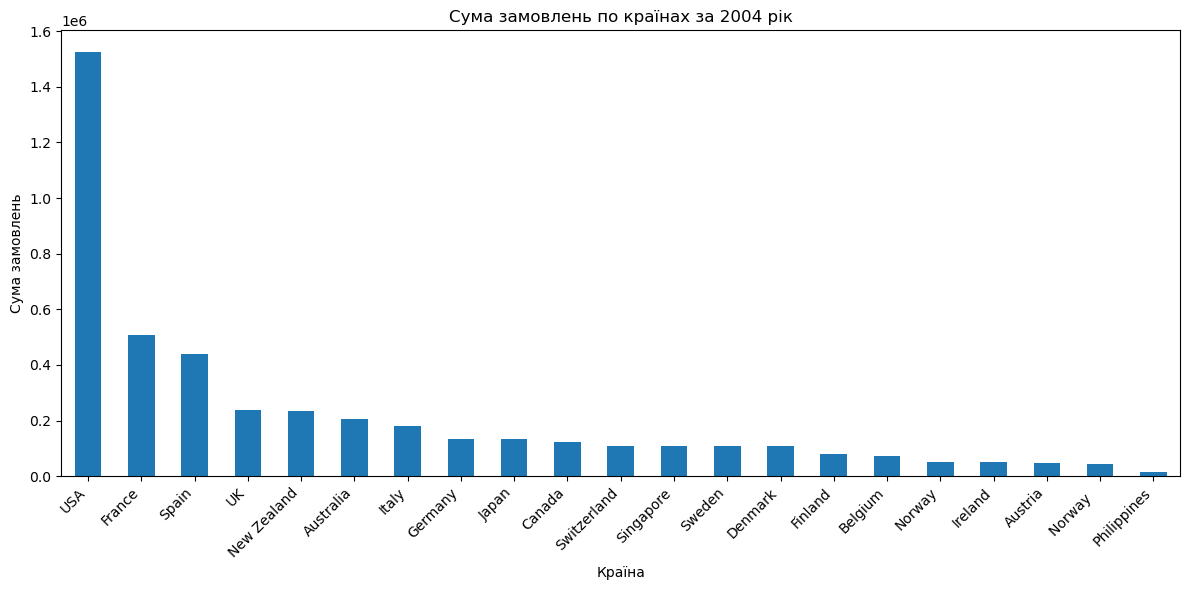

Країна з найбільшою сумою замовлень за 2004 рік: USA
Клієнт з найбільшою сумою замовлень у USA: Mini Gifts Distributors Ltd.
Сума замовлень: 231562.53
Відсоток від загальної суми замовлень країни: 15.17%


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import text

query = text('''
SELECT 
    o.orderNumber,
    o.orderDate,
    o.status,
    c.customerName,
    c.country,
    SUM(od.quantityOrdered * od.priceEach) AS totalOrderAmount
FROM orders o
JOIN customers c ON o.customerNumber = c.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
WHERE YEAR(o.orderDate) = :year
GROUP BY o.orderNumber, o.orderDate, o.status, c.customerName, c.country
ORDER BY totalOrderAmount DESC;
''')

df_orders_2004 = pd.read_sql(query, engine, params={"year": 2004})
print(df_orders_2004.head())

# Побудова стовпчастої діаграми за країнами
country_summary = df_orders_2004.groupby('country')['totalOrderAmount'].sum().sort_values(ascending=False)

country_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Сума замовлень по країнах за 2004 рік')
plt.xlabel('Країна')
plt.ylabel('Сума замовлень')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Висновок про країну з найбільшою сумою замовлень
top_country = country_summary.idxmax()
print(f"Країна з найбільшою сумою замовлень за 2004 рік: {top_country}")

# Знаходимо клієнта в цій країні з найбільшою сумою замовлень
top_country_customers = df_orders_2004[df_orders_2004['country'] == top_country]
customer_summary = top_country_customers.groupby('customerName')['totalOrderAmount'].sum()
top_customer = customer_summary.idxmax()
top_customer_amount = customer_summary.max()

# Відсоток замовлень клієнта від всіх замовлень в цій країні
percent_top_customer = (top_customer_amount / customer_summary.sum()) * 100

print(f"Клієнт з найбільшою сумою замовлень у {top_country}: {top_customer}")
print(f"Сума замовлень: {top_customer_amount:.2f}")
print(f"Відсоток від загальної суми замовлень країни: {percent_top_customer:.2f}%")


### Завдання 3: Аналітичний запит - Топ продуктів по продажах (6 балів)

В цьому завданні ви отримуєте 1 бал за правильний SQL запит і по 1 балу за кожне завдання з Python.

**Проведіть аналіз прибутковості продуктів** та для цього дістаньте з БД інформацію з наступними полями:
- Назва продукту
- Лінійка продукту (productLine)
- Загальний дохід з цього продукту (сума quantity * priceEach)
- Ранг продукту по доходу (тобто яке місце посідає цей продукт за доходом серед усіх продуктів в нашому магазині)
- Який відсоток від загального доходу компанії складає цей продукт
- Різниця з середнім доходом по лінійці продукту (в %)

Відсортуйте дані за спаданням значень колонки "Який відсоток від загального доходу компанії складає цей продукт".

При створенні SQL запиту вам можуть стати в нагоді:
- **CTE** для розрахунку доходу по кожному продукту
- **Віконні функції** для ранжування та порівняння з середнім

Після отримання даних з БД проведіть обчислення (де треба) з Python та напишіть висновки:
1. Який відсоток від загального доходу складає ТОП1 продукт і що це за продукт?
2. Створіть стовпчикову діаграму топ-10 продуктів по доходу. В скільки разів відрізняється сумарний дохід за ТОП1 продуктом від 10го продукту за сумою доходу?
3. Створіть кругову діаграму розподілу доходу по лініях продуктів. Який відсоток від всіх продажів становлять продажі за ТОП2 лініями сумарно?
4. Розрахуйте та виведіть за принципом Парето (80/20) - скільки продуктів дають 80% доходу. Тобто нам треба знайти кількість продуктів сумарне значення "відсотку від загального доходу компанії", яких складає 80 починаючи з продукту з найбільшим цим відсотком.
5. Зробіть ще будь-яке аналітичне дослідження, яке дасть нам більше розуміння наших даних, що ми дістали в БД в цьому завданні. Сформоване питання до даних і обчислення має бути обовʼязково. Візуалізація - опціонально.

Візуалізацію можна створювати з будь-якою бібліотекою на ваш вибір.

In [7]:
from sqlalchemy import text
import pandas as pd
import matplotlib.pyplot as plt

query = text("""
WITH product_revenue AS (
    SELECT 
        p.productName,
        p.productLine,
        SUM(od.quantityOrdered * od.priceEach) AS totalRevenue
    FROM products p
    JOIN orderdetails od ON p.productCode = od.productCode
    GROUP BY p.productName, p.productLine
),
revenue_stats AS (
    SELECT 
        pr.*,
        RANK() OVER (ORDER BY totalRevenue DESC) AS revenueRank,
        SUM(totalRevenue) OVER () AS totalCompanyRevenue,
        ROUND((totalRevenue / SUM(totalRevenue) OVER ()) * 100, 2) AS revenueSharePercent,
        ROUND(
            ((totalRevenue - AVG(totalRevenue) OVER (PARTITION BY productLine)) / 
              AVG(totalRevenue) OVER (PARTITION BY productLine)) * 100, 2
        ) AS deviationFromLineAvg
    FROM product_revenue pr
)
SELECT * FROM revenue_stats
ORDER BY revenueSharePercent DESC;
""")

df_products = pd.read_sql(query, engine)

Топ-1 продукт: 1992 Ferrari 360 Spider red
Частка в доході компанії: 2.88 %


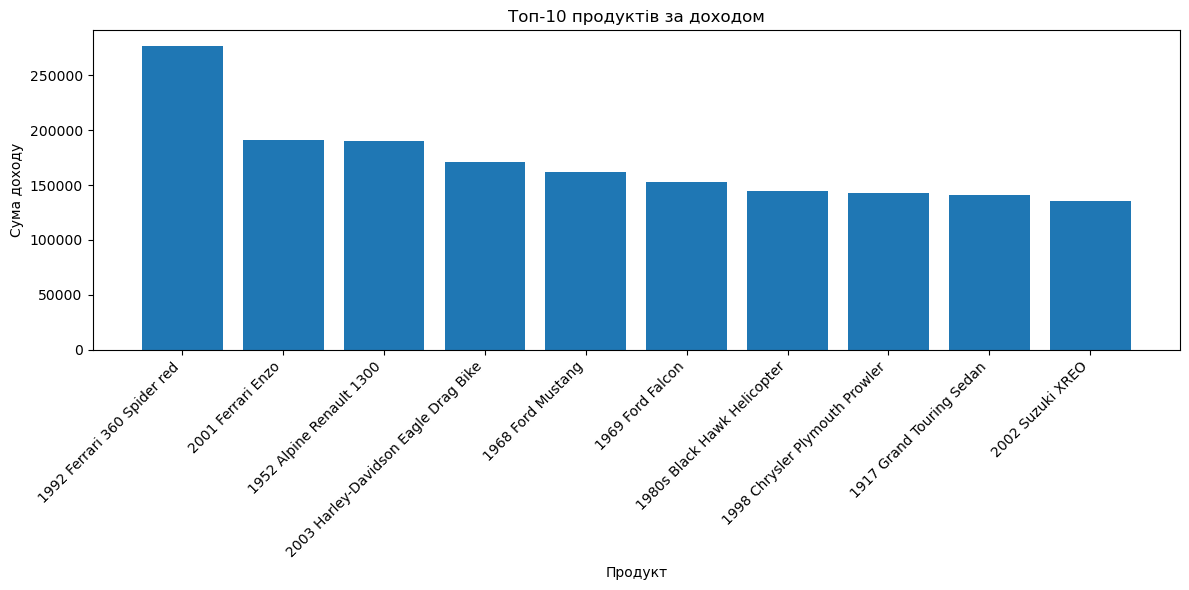

Дохід Топ-1 продукту у 2.04 разів більший за 10-й.


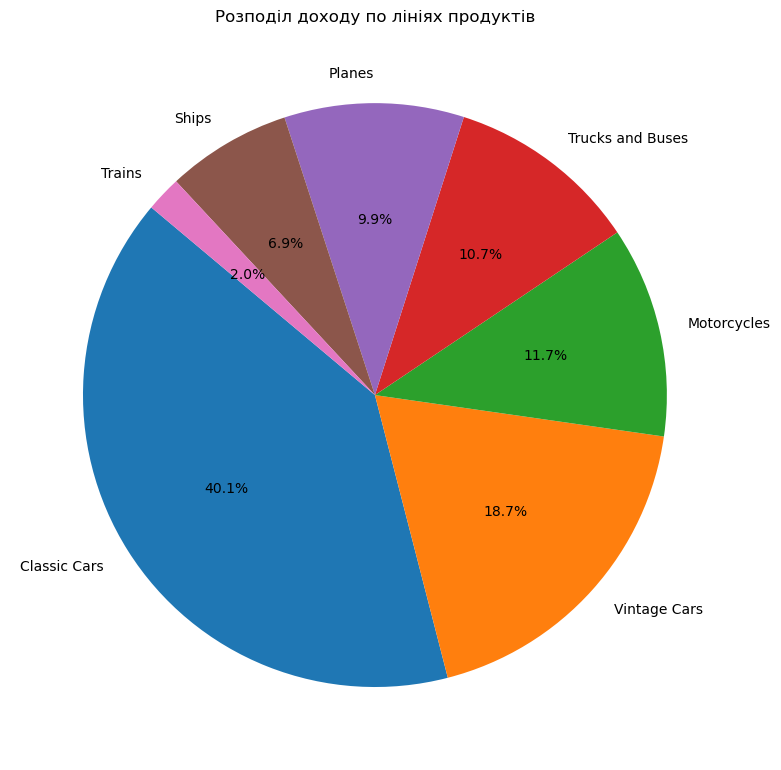

Частка ТОП-2 ліній продуктів: 58.84 %
Кількість продуктів, які генерують 80% доходу: 71
Середній дохід по лінійках:
productLine
Classic Cars        104160.067297
Trucks and Buses     93101.233636
Motorcycles          86263.547692
Planes               79553.128333
Vintage Cars         74898.317917
Ships                73777.593333
Trains               62844.306667
Name: totalRevenue, dtype: float64


In [11]:
# Топ-1 продукт
top_product = df_products.iloc[0]
print("Топ-1 продукт:", top_product['productName'])
print("Частка в доході компанії:", top_product['revenueSharePercent'], "%")

# Топ-10 продуктів: стовпчаста діаграма
top10 = df_products.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10['productName'], top10['totalRevenue'])
plt.title('Топ-10 продуктів за доходом')
plt.xlabel('Продукт')
plt.ylabel('Сума доходу')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Відношення Топ-1 до 10-го продукту
ratio = round(top10.iloc[0]['totalRevenue'] / top10.iloc[9]['totalRevenue'], 2)
print(f"Дохід Топ-1 продукту у {ratio} разів більший за 10-й.")

# Кругова діаграма по лініях продуктів
line_share = df_products.groupby('productLine')['totalRevenue'].sum()
line_share_sorted = line_share.sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(line_share_sorted, labels=line_share_sorted.index, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл доходу по лініях продуктів')
plt.tight_layout()
plt.show()

# Частка ТОП-2 ліній
top2_lines_share = round(line_share_sorted.head(2).sum() / line_share_sorted.sum() * 100, 2)
print("Частка ТОП-2 ліній продуктів:", top2_lines_share, "%")

# Принцип Парето: скільки продуктів дають 80% доходу
df_products['cumulativeShare'] = df_products['revenueSharePercent'].cumsum()
num_products_80 = df_products[df_products['cumulativeShare'] <= 80].shape[0]
print(f"Кількість продуктів, які генерують 80% доходу: {num_products_80}")

# Додаткове дослідження: Середній дохід по кожній лінійці
avg_by_line = df_products.groupby('productLine')['totalRevenue'].mean().sort_values(ascending=False)
print("Середній дохід по лінійках:")
print(avg_by_line);

### ОПЦІОНАЛЬНО. Завдання 4: Аналітичний запит - Динаміка продажів по місяцях (8 балів)

**Проведіть аналіз динаміки продажів по місяцях** та для цього дістаньте з бази інформацію з наступними полями:
- Рік та місяць замовлень
- Кількість замовлень за цей рік-місяць
- Загальний дохід (quantityOrdered * priceEach) за цей рік-місяць
- На який % ми зросли за доходом порівняно з попереднім місяцем
- Накопичувальний дохід до цього місяця за рік
- Ковзне середнє доходу за 3 місяці
- Ранг цього місяця за доходом

Використайте:
- **CTE** для агрегації продажів по місяцях
- **Віконні функції** для розрахунку:
  - Зростання доходу порівняно з попереднім місяцем (LAG)
  - Накопичувальний дохід за рік
  - Ковзне середнє доходу за 3 місяці (AVG OVER)
  - Ранжування місяців за доходом (RANK)

Після отримання даних з БД побудуйте наступні графіки і напишіть коротко, які висновки з них можна зробити.
1. Створіть лінійний графік доходу по місяцях. Чи є тред до зростання в даних?
2. Створіть графік місяць-до-місяця зростання у відсотках.
3. Створіть heatmap сезонності (місяць vs рік)
4. Відобразіть козвне середнє разом з динамікою продажів.
5. Розрахуйте кореляцію між кількістю замовлень та середнім чеком та побудуйте графік розсіювання між цими змінними. Чи є лінійна залежність?

Очікуваний результат кожного графіку - нижче.
В першому графіку я додала лінію тренду аби показати тренд. Вам її додавати не треба.


In [12]:
from sqlalchemy import text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

query = text("""
WITH monthly_sales AS (
    SELECT 
        YEAR(o.orderDate) AS orderYear,
        MONTH(o.orderDate) AS orderMonth,
        COUNT(DISTINCT o.orderNumber) AS orderCount,
        SUM(od.quantityOrdered * od.priceEach) AS totalRevenue
    FROM orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
    GROUP BY YEAR(o.orderDate), MONTH(o.orderDate)
),
enhanced_sales AS (
    SELECT 
        *,
        ROUND((totalRevenue - LAG(totalRevenue) OVER (ORDER BY orderYear, orderMonth)) 
              / LAG(totalRevenue) OVER (ORDER BY orderYear, orderMonth) * 100, 2) AS revenueGrowthPct,
        SUM(totalRevenue) OVER (PARTITION BY orderYear ORDER BY orderMonth) AS cumulativeRevenue,
        ROUND(AVG(totalRevenue) OVER (ORDER BY orderYear, orderMonth ROWS BETWEEN 2 PRECEDING AND CURRENT ROW), 2) AS rolling3MonthAvg,
        RANK() OVER (ORDER BY totalRevenue DESC) AS revenueRank
    FROM monthly_sales
)
SELECT * FROM enhanced_sales
ORDER BY orderYear, orderMonth;
""")

df_monthly = pd.read_sql(query, engine)

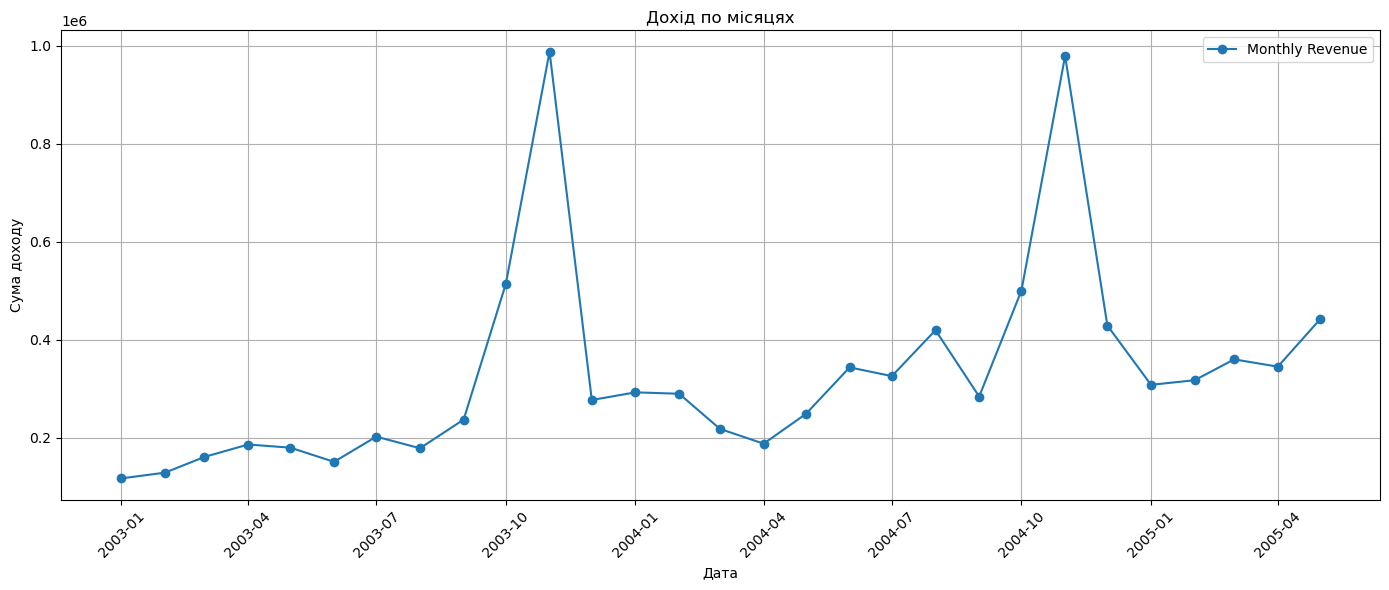

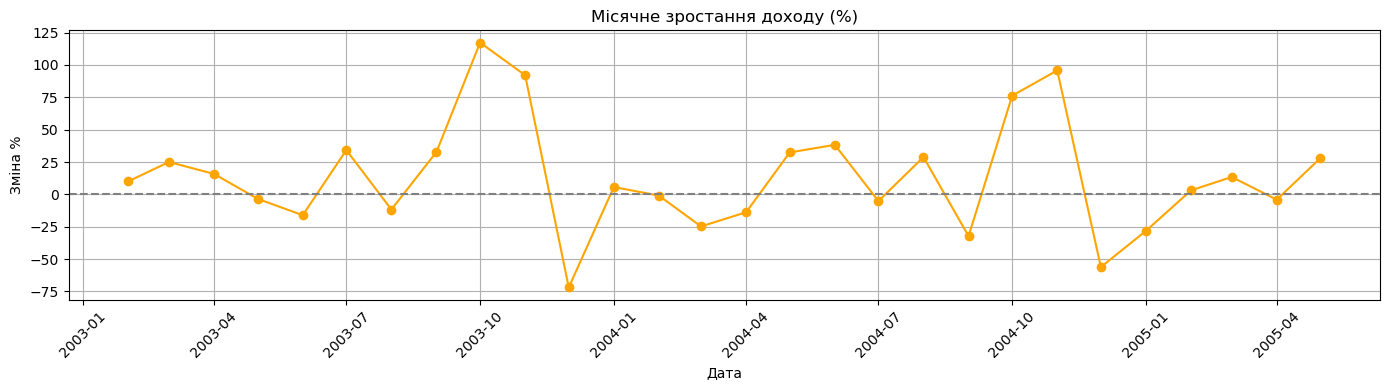

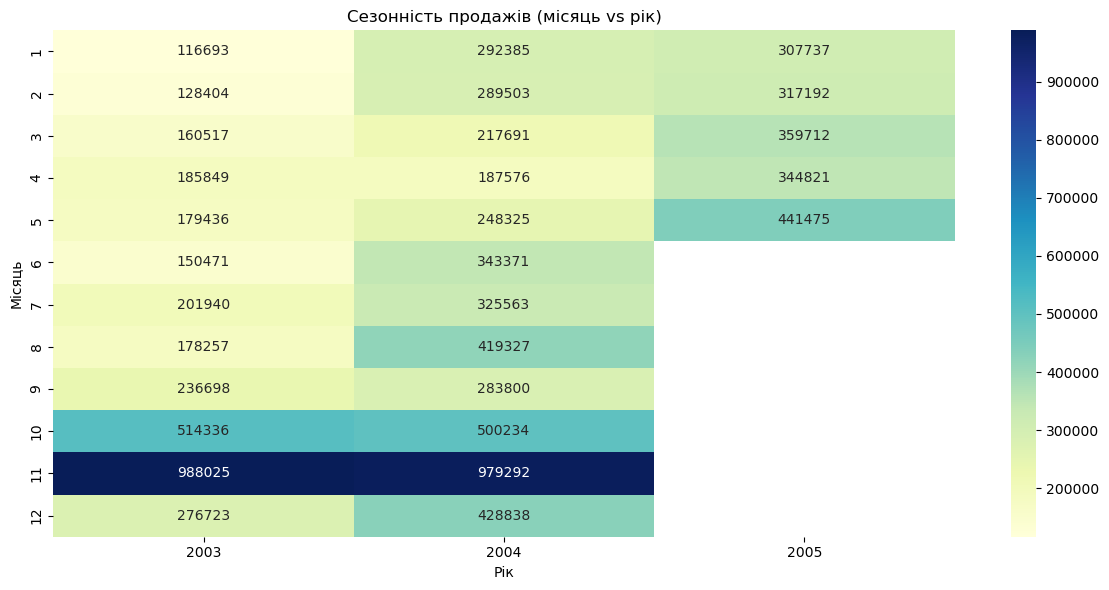

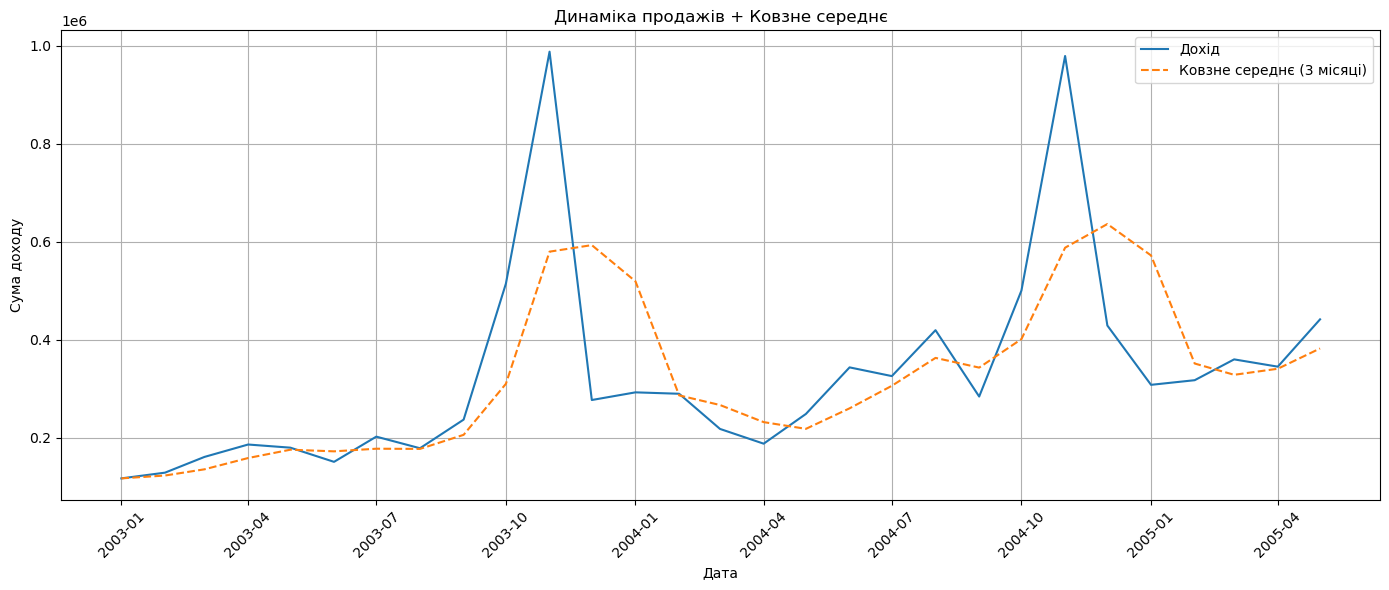

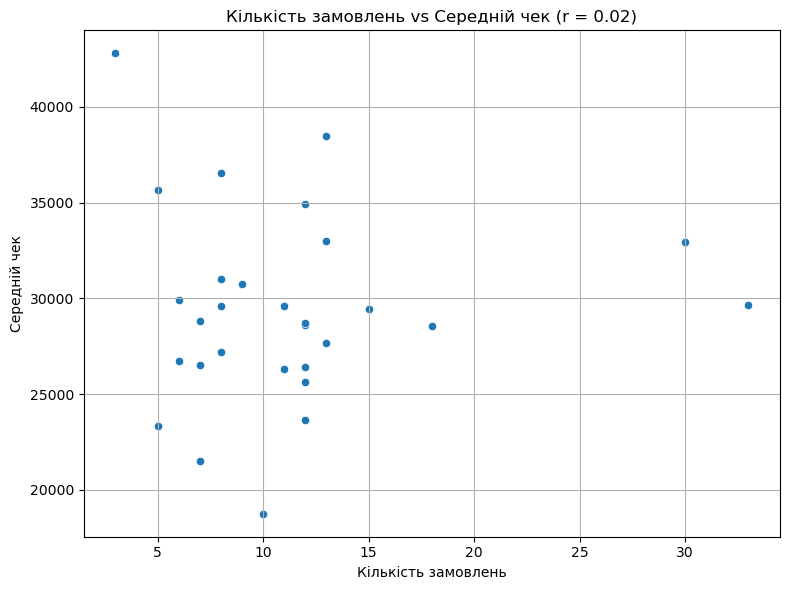

In [31]:
df_monthly['orderDate'] = pd.to_datetime(df_monthly['orderYear'].astype(str) + '-' + df_monthly['orderMonth'].astype(str).str.zfill(2))

# === Графік 1: Дохід по місяцях ===
plt.figure(figsize=(14, 6))
plt.plot(df_monthly['orderDate'], df_monthly['totalRevenue'], marker='o', label='Monthly Revenue')
plt.title('Дохід по місяцях')
plt.xlabel('Дата')
plt.ylabel('Сума доходу')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# === Графік 2: Місячне зростання (%)
plt.figure(figsize=(14, 4))
plt.plot(df_monthly['orderDate'], df_monthly['revenueGrowthPct'], marker='o', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Місячне зростання доходу (%)')
plt.xlabel('Дата')
plt.ylabel('Зміна %')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Графік 3: Heatmap сезонності ===
pivot = df_monthly.pivot(index='orderMonth', columns='orderYear', values='totalRevenue')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Сезонність продажів (місяць vs рік)')
plt.xlabel('Рік')
plt.ylabel('Місяць')
plt.tight_layout()
plt.show()

# === Графік 4: Ковзне середнє разом з доходом ===
plt.figure(figsize=(14, 6))
plt.plot(df_monthly['orderDate'], df_monthly['totalRevenue'], label='Дохід')
plt.plot(df_monthly['orderDate'], df_monthly['rolling3MonthAvg'], label='Ковзне середнє (3 місяці)', linestyle='--')
plt.title('Динаміка продажів + Ковзне середнє')
plt.xlabel('Дата')
plt.ylabel('Сума доходу')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# === Графік 5: Розсіювання замовлення vs середній чек ===
df_monthly['avgCheck'] = df_monthly['totalRevenue'] / df_monthly['orderCount']
correlation = df_monthly['avgCheck'].corr(df_monthly['orderCount'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_monthly, x='orderCount', y='avgCheck')
plt.title(f'Кількість замовлень vs Середній чек (r = {correlation:.2f})')
plt.xlabel('Кількість замовлень')
plt.ylabel('Середній чек')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
1. Лінійний графік доходу - очевидний тренд до зростання з двома вираженими піками в листопаді 2003 та 2004 років.
2. Місячне зростання доходу (%) підтверджує нелінійність та сезонність динаміки доходів.
3. Heatmap сезонності також підтверджує вищенаведені спостереження.
4. Відобразив козвне середнє разом з динамікою продажів.
5. Розрахував кореляцію між кількістю замовлень та середнім чеком та побудував графік розсіювання між цими змінними. Лінійна залежність не виявлена. 
Дуже слабка позитивна кореляція. Тобто, збільшення кількості замовлень не веде до суттєвого зростання або падіння середнього чеку.

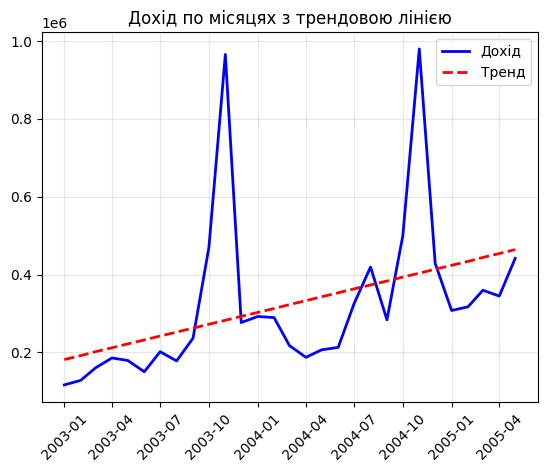

In [ ]:
# 1. Лінійний графік доходу з трендом (приклад)

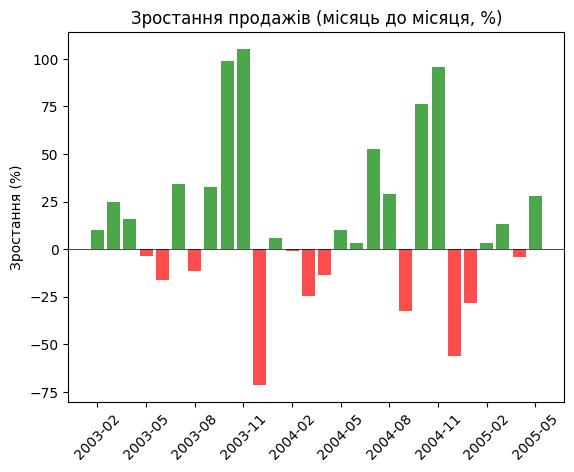

In [ ]:
# 2. Місяць-до-місяця зростання (приклад)

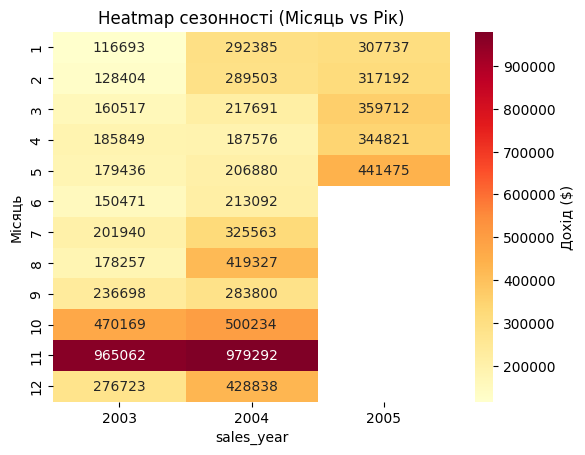

In [ ]:
# 3. Heatmap сезонності (приклад)

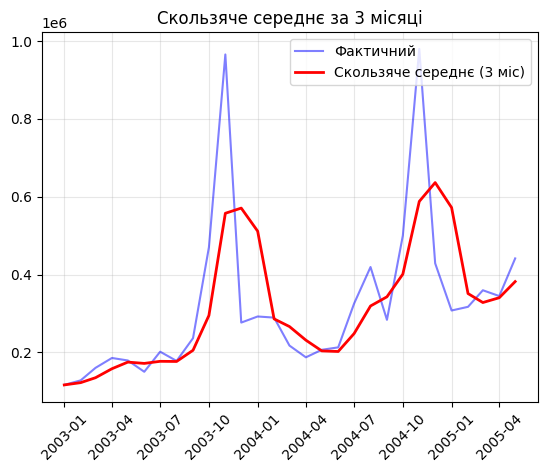

In [ ]:
# 4. Ковзне середнє з динімікою доходу (приклад)

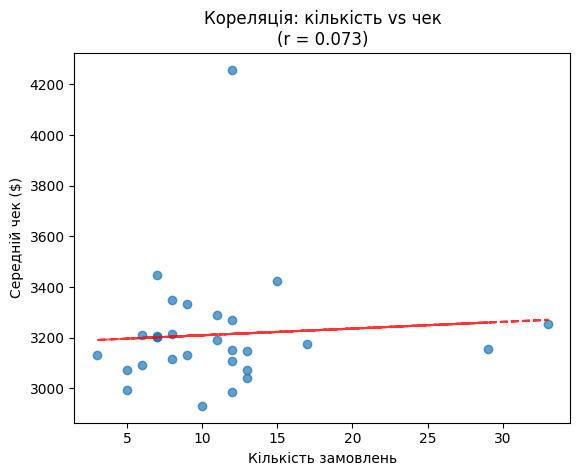

In [ ]:
# 5. Кореляція замовлень та середнього чеку (приклад)